In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("airlines_flights_data.csv")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(["arrival_time", "flight", "index"], axis=1, inplace=True)
df

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Hyderabad,Business,10.00,49,81585


In [7]:
df["price"] = (df["price"] / 87.04).round()

In [8]:
df

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Mumbai,Economy,2.17,1,68.0
1,SpiceJet,Delhi,Early_Morning,zero,Mumbai,Economy,2.33,1,68.0
2,AirAsia,Delhi,Early_Morning,zero,Mumbai,Economy,2.17,1,68.0
3,Vistara,Delhi,Morning,zero,Mumbai,Economy,2.25,1,68.0
4,Vistara,Delhi,Morning,zero,Mumbai,Economy,2.33,1,68.0
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Hyderabad,Business,10.08,49,796.0
300149,Vistara,Chennai,Afternoon,one,Hyderabad,Business,10.42,49,886.0
300150,Vistara,Chennai,Early_Morning,one,Hyderabad,Business,13.83,49,909.0
300151,Vistara,Chennai,Early_Morning,one,Hyderabad,Business,10.00,49,937.0


In [9]:
cat_col = df.select_dtypes(exclude="number").columns
cat_col

Index(['airline', 'source_city', 'departure_time', 'stops', 'destination_city',
       'class'],
      dtype='object')

In [10]:
num_col = df.select_dtypes(include="number").columns
num_col

Index(['duration', 'days_left', 'price'], dtype='object')

In [11]:
for col in cat_col:
    print(f"{col} = {df[col].nunique()}")
    print("=======================")

airline = 6
source_city = 6
departure_time = 6
stops = 3
destination_city = 6
class = 2


In [12]:
for col in num_col:
    print(f"{col} = {df[col].nunique()}")
    print("=======================")

duration = 476
days_left = 49
price = 1113


In [13]:
for col in cat_col:
    print(f"{col} = {df[col].unique()}")
    print("=======================")

airline = ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
source_city = ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time = ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops = ['zero' 'one' 'two_or_more']
destination_city = ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class = ['Economy' 'Business']


In [14]:
import matplotlib.colors as mcolors

colors = mcolors.LinearSegmentedColormap.from_list("", ["teal", "salmon"])


def get_colors(n):
    return [colors(i / n) for i in range(1, n + 1)]


plt.style.use("seaborn-v0_8")
order = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]

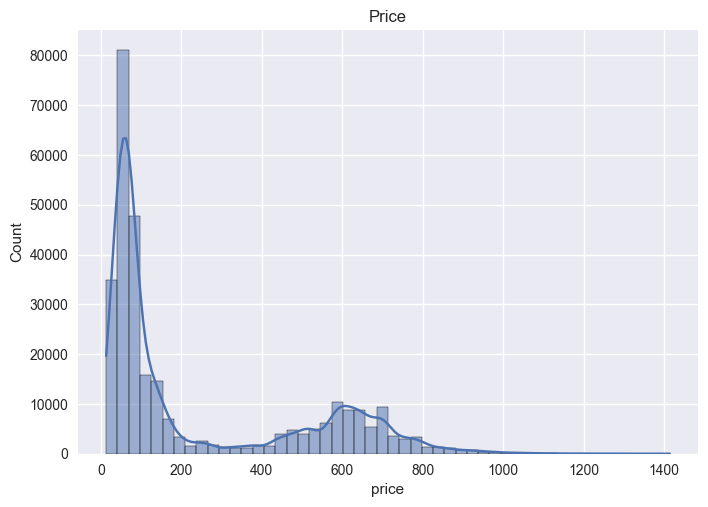

In [15]:
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price")
plt.show()

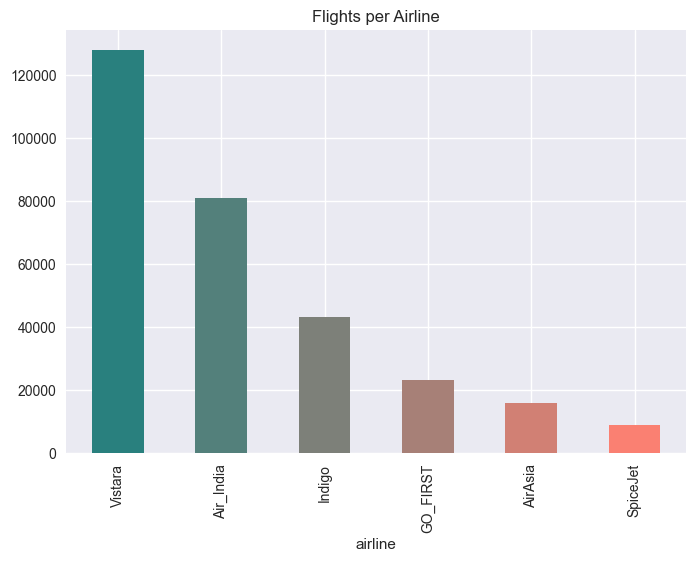

In [16]:
# عدد الرحلات لكل شركة
df["airline"].value_counts().plot(kind="bar", color=get_colors(df["airline"].nunique()))
plt.title("Flights per Airline")
plt.show()

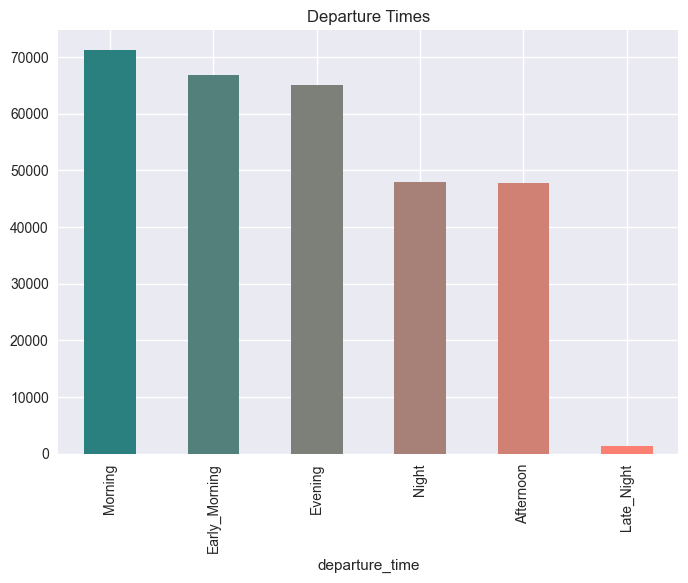

In [17]:
#  أوقات الإقلاع
df["departure_time"].value_counts().plot(
    kind="bar", color=get_colors(df["departure_time"].nunique())
)
plt.title("Departure Times")
plt.show()

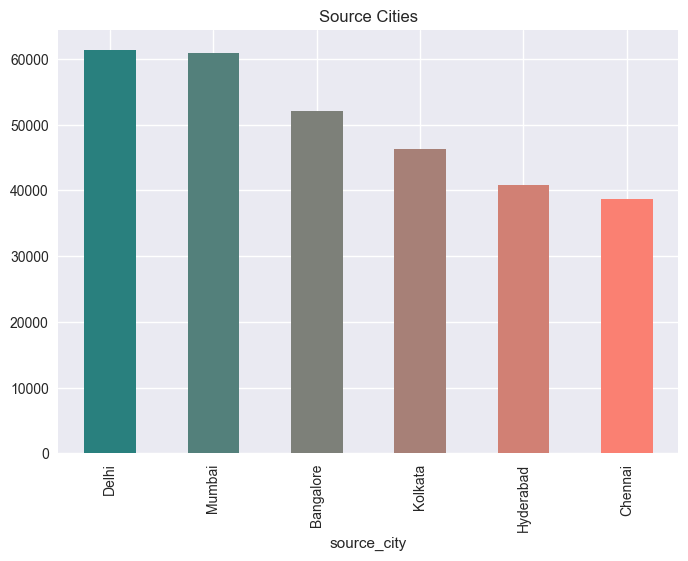

In [18]:
# المدن (المغادرة)
df["source_city"].value_counts().plot(
    kind="bar", color=get_colors(df["source_city"].nunique())
)
plt.title("Source Cities")
plt.show()

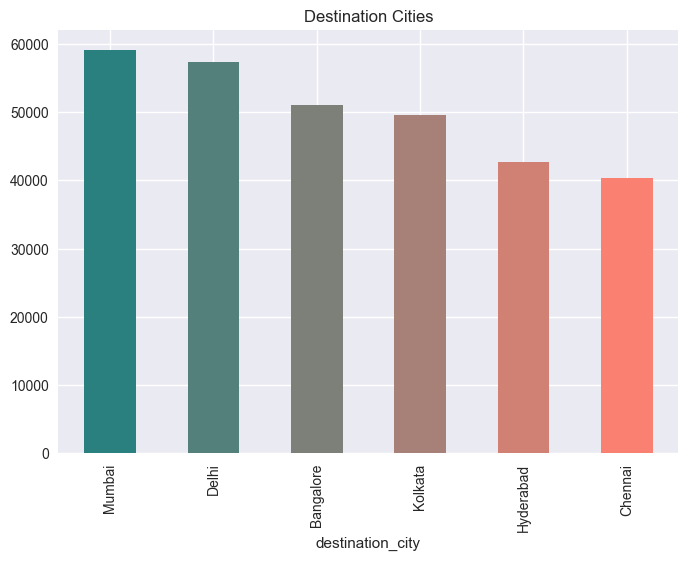

In [19]:
# المدن (الوصول)
df["destination_city"].value_counts().plot(
    kind="bar", color=get_colors(df["destination_city"].nunique())
)
plt.title("Destination Cities")
plt.show()

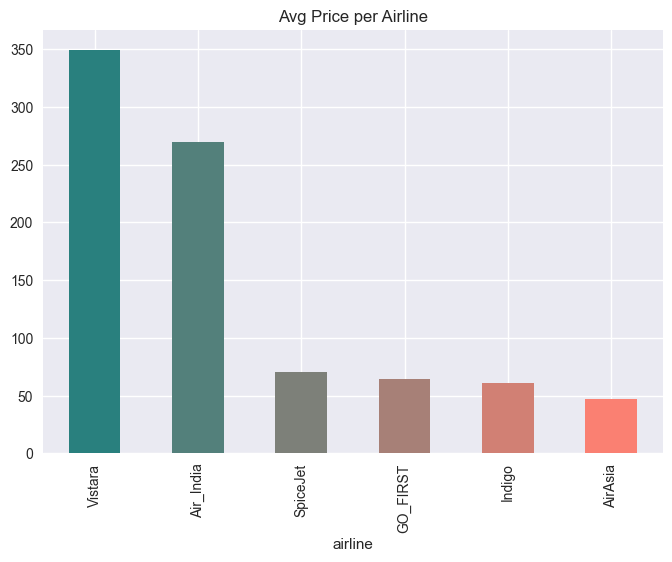

In [20]:
#  متوسط السعر حسب شركة الطيران
df.groupby("airline")["price"].mean().sort_values(ascending=False).plot(
    kind="bar", color=get_colors(df["airline"].nunique())
)
plt.title("Avg Price per Airline")
plt.show()

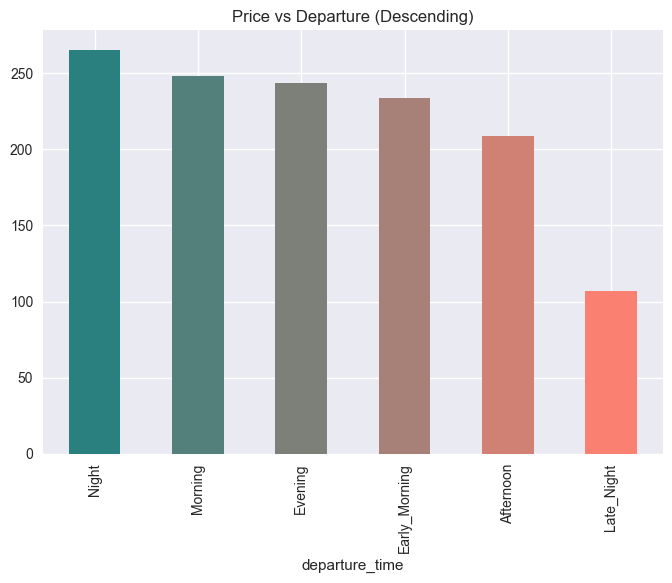

In [21]:
# متوسط السعر حسب وقت الإقلاع
df.groupby("departure_time")["price"].mean().sort_values(ascending=False).plot(
    kind="bar", color=get_colors(df["departure_time"].nunique())
)
plt.title("Price vs Departure (Descending)")
plt.show()

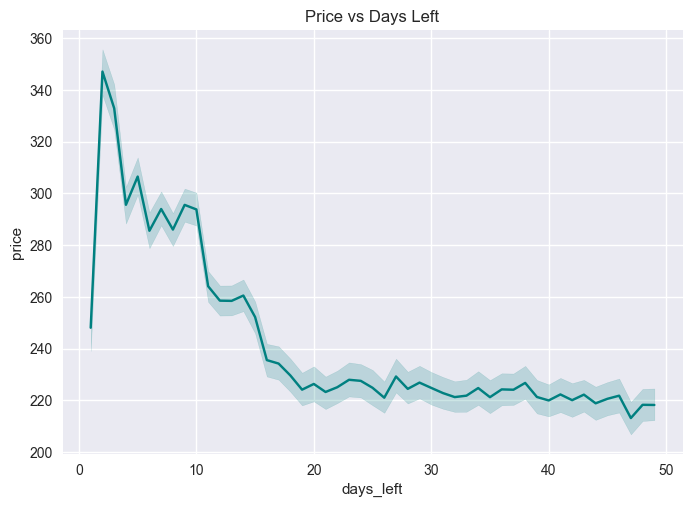

In [22]:
# السعر مقابل الأيام المتبقية
sns.lineplot(x=df["days_left"], y=df["price"], data=df, color="#008080")
plt.title("Price vs Days Left")
plt.show()

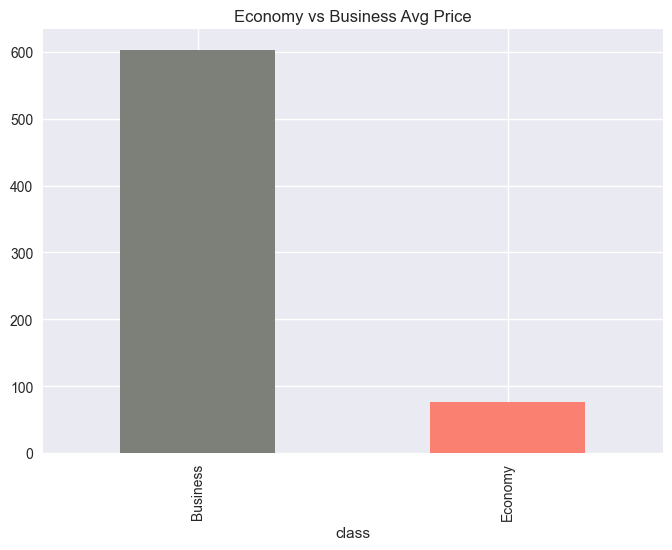

In [23]:
# Economy vs Business
df.groupby("class")["price"].mean().plot(
    kind="bar", color=get_colors(df["class"].nunique())
)
plt.title("Economy vs Business Avg Price")
plt.show()

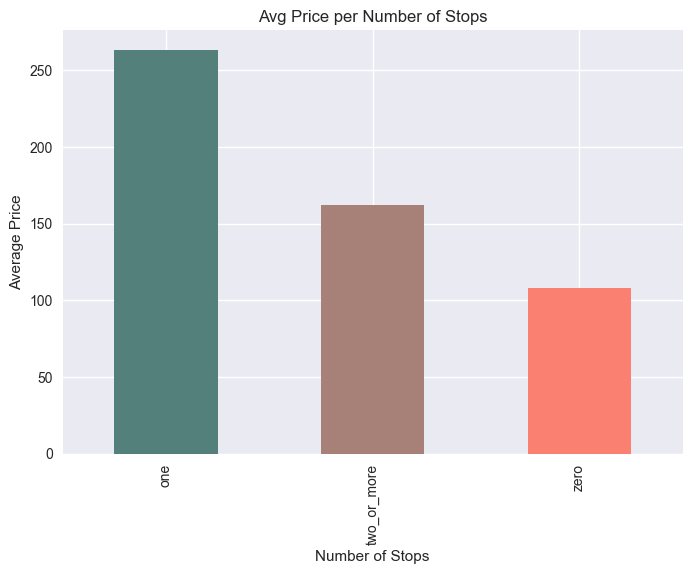

In [24]:
df.groupby("stops")["price"].mean().sort_values(ascending=False).plot(
    kind="bar", color=get_colors(df["stops"].nunique())
)
plt.title("Avg Price per Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Average Price")
plt.show()

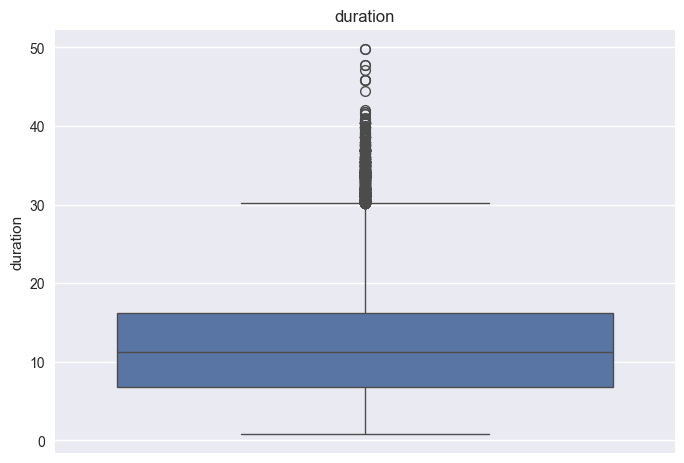

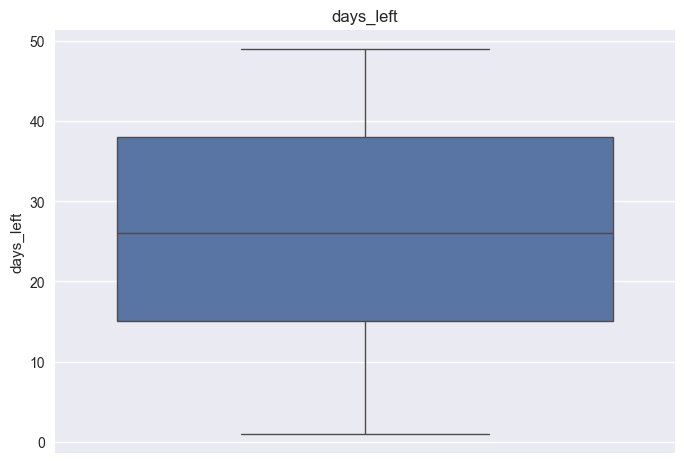

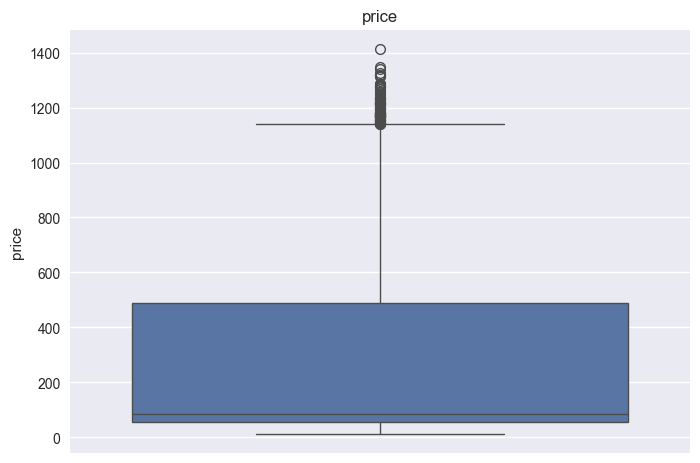

In [25]:
for col in num_col:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [26]:
q1 = df["duration"].quantile(0.25)
q3 = df["duration"].quantile(0.75)
iqr = q3 - q1
lower_item = q1 - iqr * 1.5
upper_item = q3 + iqr * 1.5

df["duration"] = df["duration"].clip(lower=lower_item, upper=upper_item)

In [27]:
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])
df

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,price
0,4,2,2,2,5,1,2.17,1,68.0
1,4,2,1,2,5,1,2.33,1,68.0
2,0,2,1,2,5,1,2.17,1,68.0
3,5,2,4,2,5,1,2.25,1,68.0
4,5,2,4,2,5,1,2.33,1,68.0
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,3,0,10.08,49,796.0
300149,5,1,0,0,3,0,10.42,49,886.0
300150,5,1,1,0,3,0,13.83,49,909.0
300151,5,1,1,0,3,0,10.00,49,937.0


In [28]:
from sklearn.model_selection import train_test_split

x = df.drop("price", axis=1)
y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101
)

In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()
RF_model.fit(x_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = RF_model.predict(x_test_scaled)
print("For Random Forest : ")
print(f"R2: {r2_score(y_test, y_pred) * 100:.2f} %")
print("MSE:", mean_squared_error(y_test, y_pred))
R2_for_RF = r2_score(y_test, y_pred) * 100

For Random Forest : 
R2: 98.42 %
MSE: 1070.4838721011147


LINEAR REGRESSION


In [32]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = reg_model.predict(x_test_scaled)
print("For Linear Regression : ")
print(f"R2: {r2_score(y_test, y_pred) * 100:.2f} %")
print("MSE:", mean_squared_error(y_test, y_pred))
R2_for_Linear_Regression = r2_score(y_test, y_pred) * 100

For Linear Regression : 
R2: 90.41 %
MSE: 6498.111462390439


SVM


In [34]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(x_train_scaled, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [35]:
y_pred = svm.predict(x_test_scaled)
print("For SVM : ")
print(f"R2: {r2_score(y_test, y_pred) * 100:.2f} %")
print("MSE:", mean_squared_error(y_test, y_pred))
R2_for_svm = r2_score(y_test, y_pred) * 100

For SVM : 
R2: 94.02 %
MSE: 4049.4907701602747


XGBOOOST

In [36]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

xgb_model.fit(x_train_scaled, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [37]:
y_pred = xgb_model.predict(x_test_scaled)
print("For XGBOOOST : ")
print(f"R2: {r2_score(y_test, y_pred) * 100:.2f} %")
print("MSE:", mean_squared_error(y_test, y_pred))
R2_for_XGboost = r2_score(y_test, y_pred) * 100

For XGBOOOST : 
R2: 97.45 %
MSE: 1724.015707147194


C:\Users\kar1m\AppData\Local\Temp\ipykernel_17776\1345426618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette="coolwarm")


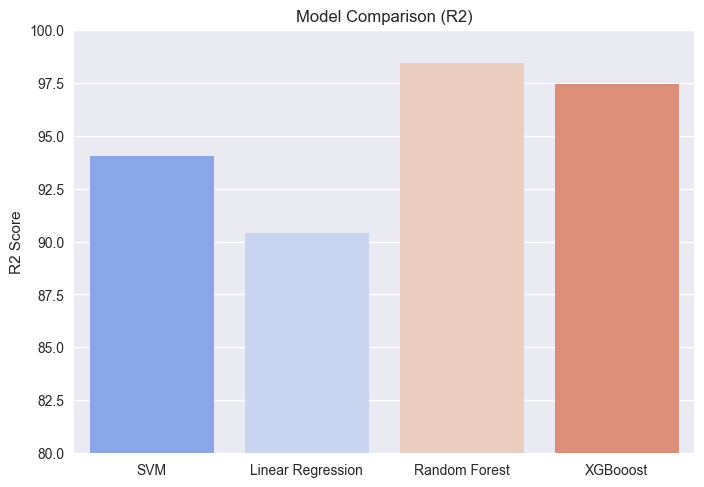

In [38]:
models = ["SVM", "Linear Regression", "Random Forest", "XGBooost"]
scores = [R2_for_svm, R2_for_Linear_Regression, R2_for_RF, R2_for_XGboost]


sns.barplot(x=models, y=scores, palette="coolwarm")
plt.ylim(80, 100)

plt.ylabel("R2 Score")
plt.title("Model Comparison (R2)")
plt.show()

In [41]:
exec(open("save_models.py", encoding="utf-8").read())

Current directory: c:\Users\kar1m\Desktop\Workspace\DEPI\final project
✅ Random Forest model saved as 'best_model.pkl'
✅ StandardScaler saved as 'scaler.pkl'

📊 File Information:
   - best_model.pkl: 795.42 MB
   - scaler.pkl: 0.00 MB
   - Total size: 795.42 MB

⚠️  Warning: Model file is large (>100MB)
   Consider using Git LFS for GitHub deployment

✨ Models saved successfully!
   You can now deploy your app using these files.
✅ Random Forest model saved as 'best_model.pkl'
✅ StandardScaler saved as 'scaler.pkl'

📊 File Information:
   - best_model.pkl: 795.42 MB
   - scaler.pkl: 0.00 MB
   - Total size: 795.42 MB

⚠️  Warning: Model file is large (>100MB)
   Consider using Git LFS for GitHub deployment

✨ Models saved successfully!
   You can now deploy your app using these files.


## Optimize Model for Deployment (Reduce Size)

In [ ]:
# Train optimized Random Forest with fewer trees
from sklearn.ensemble import RandomForestRegressor
import pickle

# Smaller model with good performance
RF_model_optimized = RandomForestRegressor(
    n_estimators=50,  # Reduced from default 100
    max_depth=15,  # Limit tree depth
    min_samples_split=10,  # Prevent overfitting
    random_state=101,
    n_jobs=-1,
)

RF_model_optimized.fit(x_train_scaled, y_train)

# Evaluate optimized model
y_pred_opt = RF_model_optimized.predict(x_test_scaled)
print("Optimized Random Forest Performance:")
print(f"R2: {r2_score(y_test, y_pred_opt) * 100:.2f}%")
print(f"MSE: {mean_squared_error(y_test, y_pred_opt):.2f}")

# Save optimized model
with open("best_model.pkl", "wb") as f:
    pickle.dump(RF_model_optimized, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

import os

model_size = os.path.getsize("best_model.pkl") / (1024 * 1024)
print(f"\n✅ Optimized model saved: {model_size:.2f} MB")